## Forage data internship 

Name: Soyinka 'Sho' Sowoolu

email: soyinkas1@gmail.com

## ANZ- Exploratory Data Analysis (Mandatory Task)

### <u>Background Information</u>

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

#### <u>Work plan</u>

This is what we will be trying to achieve the following on this task:
1. Import all the primarily required python librairies and import the data into a pandas DataFrame✅
2. Check the general information on the data such as datatypes (strings, integers, floats, datetime etc), number of rows, number of columns/features, number of missing values✅
3. Determine what type of data structure/analysis challenge we have (time-series or cross-sectional datasets for a single moment of time?)✅
4. Carry out descriptive statistics on the numerical values and any inferences from the non-numerical values
5. Data cleanup and transformations required e.g treatment of missing data, outliers, index etc.
6. Get interesting insights /KPIs such as :
    * Average, lowest and/or highest transaction amount
    * Top 10 customers by transaction volumes (spend and count of transactions)
    * Top 10 customers by location
    * Transaction trends per periods (weekly & monthly)- spend, number of customers etc.
    * Top Merchants by transaction volumes
    * Any other interesting insights from the data
    

### 1. Import `Python` libraries and dataset into notebook

In [88]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [89]:
# Import the dataset into the notebook
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [90]:
# Create a backup copy of the DataFrame
df_copy=df.copy()

### 2. Check out general information about the dataset

In [91]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [92]:
df.tail()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit
12042,authorized,1.0,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,NaN,Ryan,...,31,Mascot,NSW,2018-10-31T23:59:44.000+0000,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,151.19 -33.93,debit


In [93]:
# Explore the names of the columns (features)
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [94]:
# Explore general information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

>We have 23 columns/features  with 12,043 rows in the dataset. There are missing data in the datasets based on the uneven Non-Null counts for the features. The datatypes are strings (object), numbers (float64 & int64) and date and time (datetime64). 

In [95]:
# Explore the numerical and non-numerical (categorical) data and create a DataFrame for these
df_numerical = df.select_dtypes(include=[np.number])
df_numerical.head()

,card_present_flag,merchant_code,balance,age,amount
0,1.0,NaN,35.39,26,16.25
1,0.0,NaN,21.20,26,14.19
2,1.0,NaN,5.71,38,6.42
3,1.0,NaN,2117.22,40,40.90
4,1.0,NaN,17.95,26,3.25


>From the above, the `balance`, `age` and `amount` columns will be the focus of our descriptive statistics analysis since these are the only true numerical values in the datasets.

>Note that while the `card_present_flag` column is of the `float64` datatype it is actually used as a binary categorical data to represent a yes(1) or no (0) to whether a card was present on the transaction.

In [96]:
# Explore the numerical and non-numerical (categorical) data and create a DataFrame for these
df_non_numerical = df.select_dtypes(exclude=[np.number])
df_non_numerical.head()

,status,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,first_name,date,gender,merchant_suburb,merchant_state,extraction,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,2018-08-01,F,Ashmore,QLD,2018-08-01T01:01:15.000+0000,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,2018-08-01,F,Sydney,NSW,2018-08-01T01:13:45.000+0000,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,2018-08-01,M,Sydney,NSW,2018-08-01T01:26:15.000+0000,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2018-08-01,F,Buderim,QLD,2018-08-01T01:38:45.000+0000,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,2018-08-01,F,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit




>The missing values are noticed to be related majorly to the merchant's information. Lets confirm this 

In [97]:
# Check the missing values in the dataset
df.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [98]:
# Create a dataframe the columns(features) with the missing value only
missing_value_columns=[]
num_missing = []
for column in df.columns:
     if df[column].isna().sum()!=0:
        missing_value_columns.append(column)
        num_missing.append(df[column].isna().sum())

missing_values =pd.DataFrame(data=[missing_value_columns,num_missing],
                             index=['column','missing data']).T
missing_values

,column,missing data
0,card_present_flag,4326
1,bpay_biller_code,11158
2,merchant_id,4326
3,merchant_code,11160
4,merchant_suburb,4326
5,merchant_state,4326
6,merchant_long_lat,4326


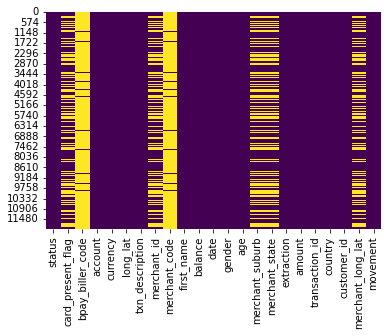

In [99]:
# Visualise the missing data spread in the dataset

# Create a heatmap of the dataframe
sns.heatmap(df.isnull(),cmap='viridis',cbar=False);

The `merchant_code` and `bpay_biller_code` have an almost equal amount of missing values of ~11159 which is ~93% of the entire data instances of 12,043.

In addition, other missing values are related to the merchant as well , the mechant's ID and location information. The missing values of 4,326 is 36% of the entire data instance of 12,043. 

We will make on decision upon further exploration of the data. However,options to explore are:

>**options:**
* We might drop the entire `merchant_code` and `bpay_biller_code`columns entirely and drop the rows with the missing values for the others. This would leave us with a final dataset of 7,717 for analysis.
* We can fill the remaining mechant info which are all objects with a string 'missing' after dropping the `merchant_code` and `bpay_biller_code`columns. This will allow us analyse all the customer's transactions.

### 3.Type of Data Structure/Analysis Required

#### With the date based transactions, we are dealing with a time-series data: 
The dataset will be better analysed as a time-series data to show trends of transaction. We can also use these trends for machine learning to predict future trends as well as identifying transactions that are not in-line with past norms (for fraud prevention). 

The date column is already in the pandas datatime datatype so the task will be to make this the index of the dataframe.

In [100]:
# Make the datetime column the index of the dataframe.
df.set_index('date',inplace=True)
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
date,,,,,,,,,,,,,,,,,,,,,
2018-08-01,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
2018-08-01,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2018-08-01,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
2018-08-01,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
2018-08-01,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


#### we will carry out some feature engineering on the date component by splitting into weeks and months and adding these as new columns

In [101]:
# Add column for the month of the transaction
df['transaction_month']=pd. DatetimeIndex(df.index).month

In [102]:
# Add column for the week of the week for the transaction
df['week_num'] = pd.DatetimeIndex(df.index).isocalendar().week

In [103]:
# View the new columns
df[['transaction_month','week_num']]

,transaction_month,week_num
date,,
2018-08-01,8,31
2018-08-01,8,31
2018-08-01,8,31
2018-08-01,8,31
2018-08-01,8,31
...,...,...
2018-10-31,10,44
2018-10-31,10,44
2018-10-31,10,44


### 4. Look at descriptive statistics of the data

In [104]:
# We can now check for some descriptive statistics of the data
df.describe()

,card_present_flag,merchant_code,balance,age,amount,transaction_month,week_num
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588,9.011957,37.401312
std,0.398029,0.0,31503.722652,10.046343,592.599934,0.816511,3.774202
min,0.000000,0.0,0.240000,18.000000,0.100000,8.000000,31.000000
25%,1.000000,0.0,3158.585000,22.000000,16.000000,8.000000,34.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000,9.000000,37.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000,10.000000,41.000000
max,1.000000,0.0,267128.520000,78.000000,8835.980000,10.000000,44.000000


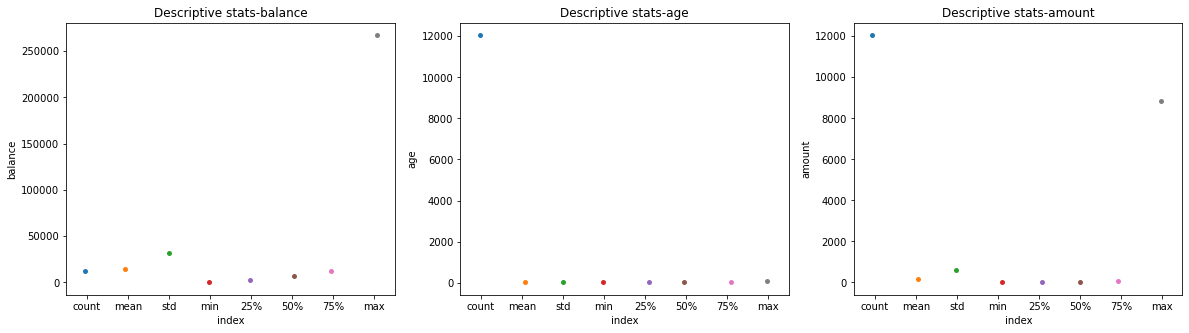

In [105]:
# Visualise the major descriptive statistics by creating subplots

# Setup the subplots
fig,ax = plt.subplots(1,3, figsize=(20,5),sharex=True)

# To remove any unwanted variable from plot
describe_df = df.describe(include=['int64','float64'])
describe_df.reset_index(inplace=True)
describe_df =describe_df.loc[:, describe_df.columns.str.contains('index')| 
                             describe_df.columns.str.contains('balance')| 
                             describe_df.columns.str.contains('age')| 
                             describe_df.columns.str.contains('amount')]


axes=0
for i in describe_df.columns:
    if i in ['index']:
        continue
    sns.stripplot(ax = ax[axes], x='index', y=i, data=describe_df)
    ax[axes].set_title("Descriptive stats-"+i)
    axes +=1

In [106]:
print(f'The average age of customers is: {df.age.mean():.0f}')
print(f'The average transaction amount is: {df.amount.mean():.2f}')
print(f'The average balance is: {df.balance.mean():.2f}')

The average age of customers is: 31
The average transaction amount is: 187.93
The average balance is: 14704.20


In [107]:
# Check the non_numeric values for any inferences
df_non_numerical.head()

,status,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,first_name,date,gender,merchant_suburb,merchant_state,extraction,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,2018-08-01,F,Ashmore,QLD,2018-08-01T01:01:15.000+0000,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,2018-08-01,F,Sydney,NSW,2018-08-01T01:13:45.000+0000,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,2018-08-01,M,Sydney,NSW,2018-08-01T01:26:15.000+0000,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2018-08-01,F,Buderim,QLD,2018-08-01T01:38:45.000+0000,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,2018-08-01,F,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [108]:
df_non_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   bpay_biller_code   885 non-null    object        
 2   account            12043 non-null  object        
 3   currency           12043 non-null  object        
 4   long_lat           12043 non-null  object        
 5   txn_description    12043 non-null  object        
 6   merchant_id        7717 non-null   object        
 7   first_name         12043 non-null  object        
 8   date               12043 non-null  datetime64[ns]
 9   gender             12043 non-null  object        
 10  merchant_suburb    7717 non-null   object        
 11  merchant_state     7717 non-null   object        
 12  extraction         12043 non-null  object        
 13  transaction_id     12043 non-null  object        
 14  countr

> The longitude and latitude are numbers which have object datatype, so we will convert this to floats so that we can plot this to see the spread of location that the transactions took place from.

>We would also check the unique number of merchants and customers (with their gender) that transacted using the `merchant)id`, `first_name`and `gender`

In [109]:
# Split the 'long_lat'column into 'long' and 'lat' beore converting this to float
df['long_lat']
df[['long','lat']] = df['long_lat'].str.split(" ",expand=True,)
df[['mer_long','mer_lat']] = df['merchant_long_lat'].str.split(" ",expand=True,)
# Convert the columns to float
df[['long','lat','mer_long','mer_lat']]=df[['long','lat','mer_long','mer_lat']].astype('float64')
df[['long','lat','mer_long','mer_lat']].dtypes

long        float64
lat         float64
mer_long    float64
mer_lat     float64
dtype: object

In [110]:
# drop the'long_lat' column
df.drop('long_lat',axis=1,inplace=True)

In [111]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,txn_description,merchant_id,merchant_code,first_name,balance,...,country,customer_id,merchant_long_lat,movement,transaction_month,week_num,long,lat,mer_long,mer_lat
date,,,,,,,,,,,,,,,,,,,,,
2018-08-01,authorized,1.0,NaN,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,...,Australia,CUS-2487424745,153.38 -27.99,debit,8,31,153.41,-27.95,153.38,-27.99
2018-08-01,authorized,0.0,NaN,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,...,Australia,CUS-2487424745,151.21 -33.87,debit,8,31,153.41,-27.95,151.21,-33.87
2018-08-01,authorized,1.0,NaN,ACC-1222300524,AUD,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,...,Australia,CUS-2142601169,151.21 -33.87,debit,8,31,151.23,-33.94,151.21,-33.87
2018-08-01,authorized,1.0,NaN,ACC-1037050564,AUD,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,...,Australia,CUS-1614226872,153.05 -26.68,debit,8,31,153.10,-27.66,153.05,-26.68
2018-08-01,authorized,1.0,NaN,ACC-1598451071,AUD,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,...,Australia,CUS-2487424745,153.44 -28.06,debit,8,31,153.41,-27.95,153.44,-28.06


In [112]:
# Find the number of unique merchants, customers and their gender

# number of mechants
num_merchant = len(df.groupby('merchant_id').count())
num_merchant

5725

In [113]:
# number of customers
num_customer = len(df.groupby('first_name').count())
num_customer

80

In [114]:
# number of male and female customers
df_gender=df.groupby(['first_name','gender']).count()
# df_gender
female =len(df_gender.loc(axis=0)[pd.IndexSlice[:,'F']])
male =len(df_gender.loc(axis=0)[pd.IndexSlice[:,'M']])

print(f'There are:{male} male customers')
print(f'There are:{female} female customers')

There are:41 male customers
There are:39 female customers


### 5. Data cleanup and transformations required e.g treatment of missing data, outliers, index etc.

#### ***Missing data***
To handle the missing values, we will: 
    
>* drop entirely the following columns due to the significant amount of missing values:
    * `merchant_code`
    * `bpay_biller_code`
    
>* fill the following info which are all objects with a string 'missing'
    * `card_present_flag`
    * `merchant_id`
    * `merchant_suburb`
    * `merchant_state`
    * `merchant_long_lat`
 
>* fill the `card_present_flag` with 'zero'. ***We are assuming that any transaction with missing value for card present had no card present on the transaction.***

In [115]:
# Drop the unwanted columns 'merchant_code' and 'bpay_biller_code'
df.drop('merchant_code', axis=1,inplace =True)
df.drop('bpay_biller_code', axis=1,inplace =True)


In [116]:
df.head()

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,gender,age,...,country,customer_id,merchant_long_lat,movement,transaction_month,week_num,long,lat,mer_long,mer_lat
date,,,,,,,,,,,,,,,,,,,,,
2018-08-01,authorized,1.0,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,F,26,...,Australia,CUS-2487424745,153.38 -27.99,debit,8,31,153.41,-27.95,153.38,-27.99
2018-08-01,authorized,0.0,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,F,26,...,Australia,CUS-2487424745,151.21 -33.87,debit,8,31,153.41,-27.95,151.21,-33.87
2018-08-01,authorized,1.0,ACC-1222300524,AUD,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,M,38,...,Australia,CUS-2142601169,151.21 -33.87,debit,8,31,151.23,-33.94,151.21,-33.87
2018-08-01,authorized,1.0,ACC-1037050564,AUD,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,F,40,...,Australia,CUS-1614226872,153.05 -26.68,debit,8,31,153.10,-27.66,153.05,-26.68
2018-08-01,authorized,1.0,ACC-1598451071,AUD,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,F,26,...,Australia,CUS-2487424745,153.44 -28.06,debit,8,31,153.41,-27.95,153.44,-28.06


In [117]:
df.columns

Index(['status', 'card_present_flag', 'account', 'currency', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'transaction_month', 'week_num', 'long', 'lat', 'mer_long',
       'mer_lat'],
      dtype='object')

In [121]:
# Fill the missing values with 'missing' apart from card_present_flag which is filled with zero

# fill card_present_flag which is filled with zero
df[['card_present_flag']] = df[['card_present_flag']].fillna(value=0)

# fill other remaining missing values with 'missing'
df = df.fillna(value='missing')


In [122]:
# Confirm they are no more missing values
df.isna().sum()

status               0
card_present_flag    0
account              0
currency             0
txn_description      0
merchant_id          0
first_name           0
balance              0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
country              0
customer_id          0
merchant_long_lat    0
movement             0
transaction_month    0
week_num             0
long                 0
lat                  0
mer_long             0
mer_lat              0
dtype: int64

In [ ]:
# Plot a box-plot to see if there are any anormaly/outliers that jumps at us from the dataset.

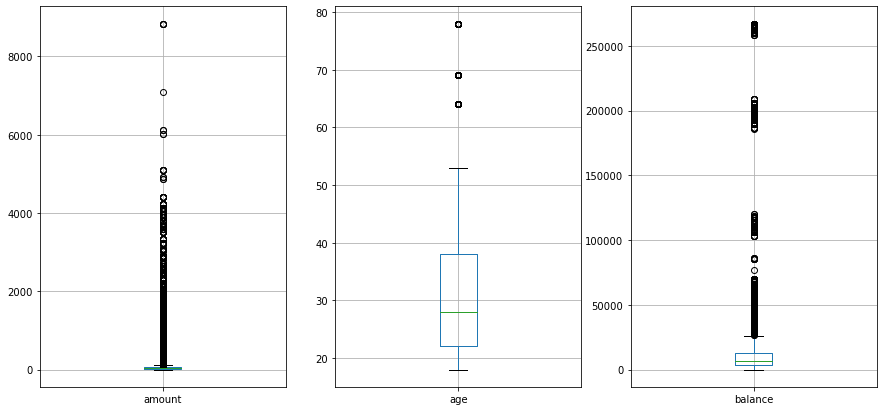

In [172]:
fig ,axes=plt.subplots(1,3,figsize=(15,7))

# for column in df_numerical:
# sns.boxplot(data=df_numerical)
df_numerical.boxplot(column='amount', ax=axes[0])
df_numerical.boxplot(column='age', ax=axes[1])
df_numerical.boxplot(column='balance', ax=axes[2]);
# plt.xticks(rotation=45)

In [174]:
# Lets look at the median and not just mean of these values
df_numerical['age'].median(),df_numerical['balance'].median(),df_numerical['amount'].median()

(28.0, 6432.01, 29.0)

<AxesSubplot:>

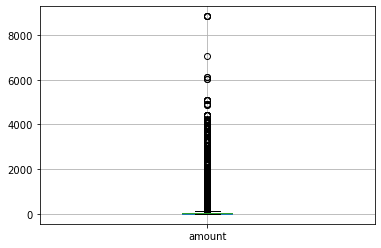

In [175]:
df_numerical.boxplot(column='amount')

In [121]:
# Check the number of distinct customers and amout of transactions
unique, counts = np.unique(df['first_name'], return_counts=True)

result = np.column_stack((unique, counts)) 
result[:5]

array([['Abigail', 102],
       ['Alexander', 91],
       ['Amy', 124],
       ['Andrew', 34],
       ['Antonio', 115]], dtype=object)

In [122]:
# Find the customer with the highest number of transaction
results= pd.DataFrame(result)

In [123]:
results.rename(columns={0:"customer",1:"No of Transactions"},inplace =True)
results.head()

,customer,No of Transactions
0,Abigail,102
1,Alexander,91
2,Amy,124
3,Andrew,34
4,Antonio,115


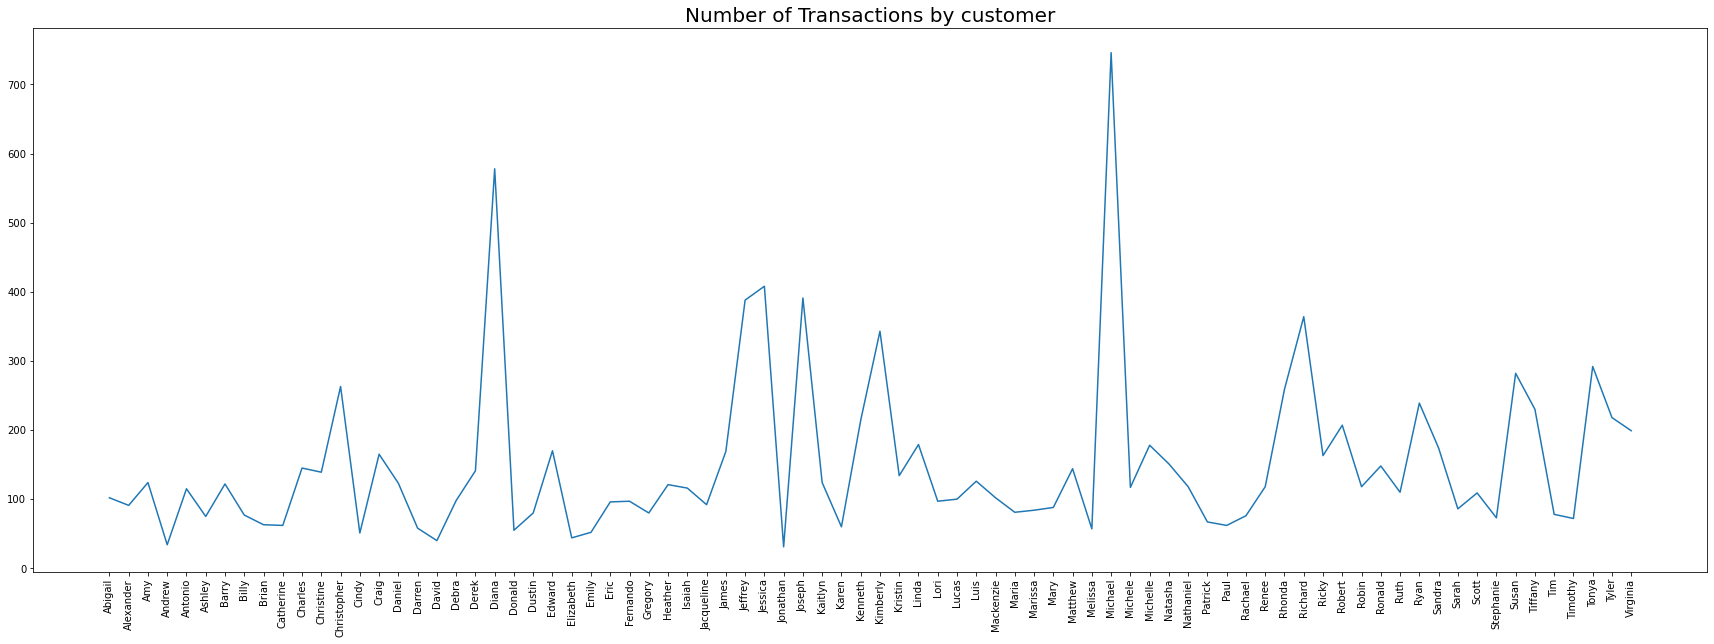

In [124]:
plt.figure(figsize=(30,10))
plt.plot(results['customer'],results['No of Transactions'])
plt.title("Number of Transactions by customer",fontdict={'fontsize': 20})
plt.xticks(rotation='vertical');


In [125]:
results.max()

customer              Virginia
No of Transactions         746
dtype: object

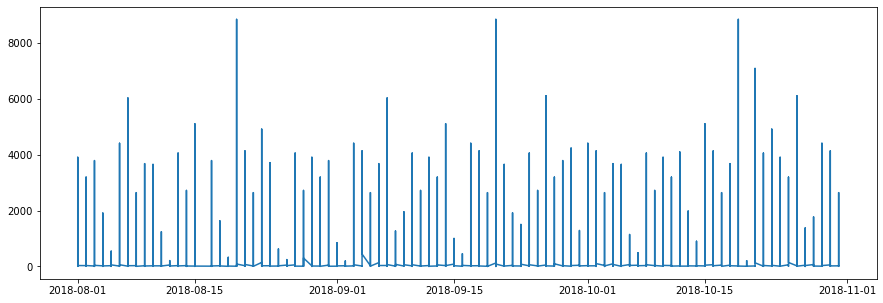

In [169]:
# Visualise some selected features of interest and their relationships 

# value of transactions per Period (monthly)
plt.figure(figsize=(15,5))
y = df['amount']
x= df.index
plt.plot(x,y)
plt.show()

In [128]:
# Weekly average transactions
week_average=df.groupby(by='week_num').mean()
week_average.head()

,card_present_flag,merchant_code,balance,age,amount,transaction_month
week_num,,,,,,
31,0.790646,0.0,11116.058886,30.974398,151.315346,8.000000
32,0.827160,0.0,10117.965839,31.321029,191.737796,8.000000
33,0.812375,0.0,10897.896005,29.656131,180.216372,8.000000
34,0.801997,0.0,10149.812446,30.368478,189.795859,8.000000
35,0.789050,0.0,11856.020968,29.667021,162.706660,8.282979


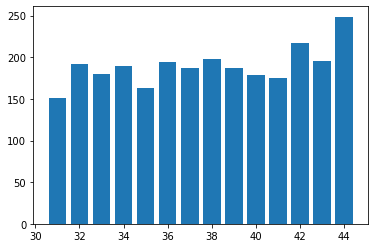

In [129]:
# Plot a bar chart of the average transaction amount per week
plt.bar(week_average.index,week_average.amount);


In [130]:
# Weekly average transactions
month_average=df.groupby(by='transaction_month').mean()
month_average.head()

,card_present_flag,merchant_code,balance,age,amount,week_num
transaction_month,,,,,,
8,0.805128,0.0,10794.148620,30.482881,185.121867,33.011666
9,0.799308,0.0,14730.151136,30.533516,182.045903,37.336656
10,0.803565,0.0,18450.991566,30.726205,196.427323,41.69978


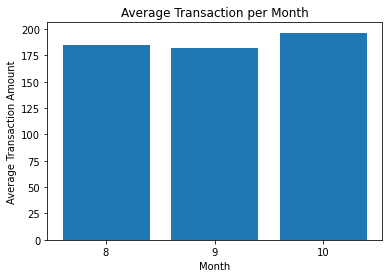

In [196]:
# Plot a bar chart of the average transaction amount per month
plt.bar(month_average.index,month_average.amount);
plt.xticks([8,9,10])
plt.xlabel('Month')
plt.ylabel('Average Transaction Amount')
plt.title("Average Transaction per Month");

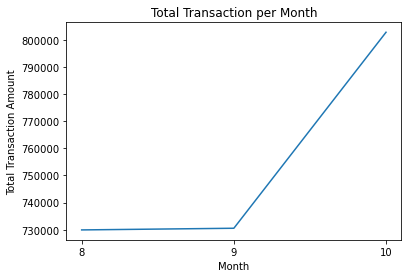

In [202]:
total_per_month=df.groupby(['transaction_month'])['amount'].sum()
plt.plot(total_per_month)
plt.xticks([8,9,10])
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.title("Total Transaction per Month");

In [253]:
# Top 10 customer by transaction counts
trans_per_customer=df.groupby(by='first_name').count()
trans_per_customer.sort_values(by='account',ascending=False,inplace=True)
T10_trans_per_customer=trans_per_customer.iloc[:10,3:5]


In [254]:
T10_trans_per_customer

,account,currency
first_name,,
Michael,746,746
Diana,578,578
Jessica,408,408
Joseph,391,391
Jeffrey,388,388
Richard,364,364
Kimberly,343,343
Tonya,292,292
Susan,282,282


In [237]:
# Top 10 customer by transaction total amount
amount_per_customer=df.groupby(by='first_name')['amount'].sum()

amount_per_customer.sort_values(ascending=False, inplace=True)
T10_amount_per_customer=amount_per_customer[:10]
T10_amount_per_customer=pd.DataFrame(T10_amount_per_customer)
T10_amount_per_customer

,amount
first_name,
Michael,142329.98
Kenneth,82195.29
Jessica,63533.73
Richard,55578.70
Ryan,53408.03
Linda,51807.91
Susan,50452.10
Joseph,44996.17
Kimberly,44853.05
